# 4 - Defining a .geo file

In this section we discuss how to create a geometry file ($\texttt{.geo}$), with the geometry file being interpreted by Netgen (the meshing tool in NGSolve) we first explain how to create shapes and geometries using a $\texttt{.geo}$ file.

Due to Netgen being the underlying interpreter of the $\texttt{.geo}$ file we direct the user to the relevant Constructive Solid Geometry (CSG) documentation available at [http://netgen-mesher.sourceforge.net/docs/ng4.pdf](http://netgen-mesher.sourceforge.net/docs/ng4.pdf) and the large number of example geo files avaliable on the Netgen github page ([https://github.com/NGSolve/netgen/tree/master/tutorials](https://github.com/NGSolve/netgen/tree/master/tutorials)).

The basic idea is that always place a conducting object of interest in the centre of the domain and enclose it in a large non-conducting region (eg a large box or sphere). Usually, we choose the object to be centered at the origin, but this is more for convenience. The object's position is not important as the MPT coefficients are independent of the object's position.

## Controlling the material parameters of a conducting sphere using a .geo file

So far we have considered the MPT characterisation of a conducting sphere with $\sigma_*=10^6$ S/m, $\mu_r=10$, and radius $\alpha=0.001$ m by constructing a coarse unstructured tetrahedral discretisation of a unit sphere set in truncated unbounded region in the form of a larger sphere of radius 100 units using order $p=2$ elements. Note the physical object is obtained by scaling the non-dimensional computational domain by $\alpha$. For example, specifying $\alpha =0.001$ m means that the dimensions of the non-dimensional object correspond to its size in mm. The recommended approach is to specify unit-sized dimensions of the non-dimensional object (e.g. in the previous examples we had a non-dimensional sphere of unit radius) and to control its size using $\alpha$. 
Also, by default, we place the object of interest at the centre of the domain and choose the origin to be a point inside the object of interest. As mentioned, the exact positioning of the object is not important as the MPT coefficients are independent of object location.

Now wish to control the materials of the sphere in more detail.

In the folder $\texttt{Geofiles/}$ there are a series of pre-setup object descriptions including $\texttt{sphere.geo}$ that contains the following

```
algebraic3d

solid sphout = sphere (0, 0, 0; 100);
solid sphin = sphere (0, 0, 0; 1) -maxh=0.2;

solid rest = sphout and not sphin;

tlo rest -transparent -col=[0,0,1];#air
tlo sphin -col=[1,0,0];#sphere -mur=10 -sig=1e6

```

All $\texttt{.geo}$ files follow the same format and will not work otherwise.

```
algebraic3d
```
is the top level command that every .geo file requires before any non commented lines. Comments are denoted using $\texttt{#}$ and continue to the end of the line.

Named components of the $\texttt{.geo}$ file are identified using the keyword $\texttt{solid}$, and constructed using object primitives. For example
```
solid sphout = sphere (0, 0, 0; 100);

solid sphin = sphere (0, 0, 0; 1) -maxh=0.5;
```
defines two spheres, $\texttt{sphout}$ and $\texttt{sphin}$, centered at the origin and of radii 100 and 1 respectively that we can reuse later. 
The $\texttt{-maxh}$ tag can be used to directly specify the maximum element size inside the associated object. For example, here we set the maximum element size inside the inner sphere to be 0.5. <b> the $\texttt{-maxh}$ tag overrides the mesh size option in MPT-Calculator.</b>

Complex objects are constructed by Eulerian operations applied to primitives. The keywords $\texttt{and}$ and $\texttt{or}$ denote the intersection and union respectively of the two solids, so the line
```
solid rest = sphout and not sphin;
```
defines a solid that contains only the region that is occupied by the outer sphere and not the inner sphere.

Finally, we wish to define which objects will be meshed. This is done using the $\texttt{tlo}$ tag.
```
tlo rest -transparent -col=[0,0,1];#air
tlo sphin -col=[1,0,0];#sphere -mur=10 -sig=1e6
```
The object names, $\texttt{-mur}$, and $\texttt{-sig}$ are used by MPT-Calculator to assign material properties to each object and are not used by the mesher.

The $\texttt{#air}$ is used to denote a vacuum  and here we not prescribe permeability and conductivity (their values are chosen as $\mu_r=1$ and $\sigma=0$ by default), thus this example defines a unit sphere of $\mu_r = 10$ and $\sigma_*=10^6$ S/m surrounded by a larger non-conductive, non-magnetic domain that has an outer boundary in the form of a sphere of radius 100 units. Remember that the actual object size is controlled by the $\alpha$ parameter, which has a default value of $\alpha =0.001 $ m.

## Examples of different material properties
In this section, we explore the effects of altering the material properties in the .geo file.

We begin by importing the required packages and navigating to the project root directory

In [1]:
# This bit code allows a python file to be changed and then for the updates to be available without restarting
# the jupyter kernal
%load_ext autoreload
%autoreload 2

from time import time
import numpy as np
from matplotlib import pyplot as plt
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path=r'C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator'
os.chdir(Your_Path)
os.getcwd()

'C:\\Users\\James\\Desktop\\Release_Ready_MPT_Calculator\\Restructured_MPT_Calculator'

The user is encouraged to make changes to the material properties of the $\texttt{sphere.geo}$ file and run main()

sphere.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 7592


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains  7592 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1


Solving Theta1: 100%|███████████████████████████████████████████████████████████████| 40/40 [02:59<00:00,  4.48s/it]


Frequency Sweep complete


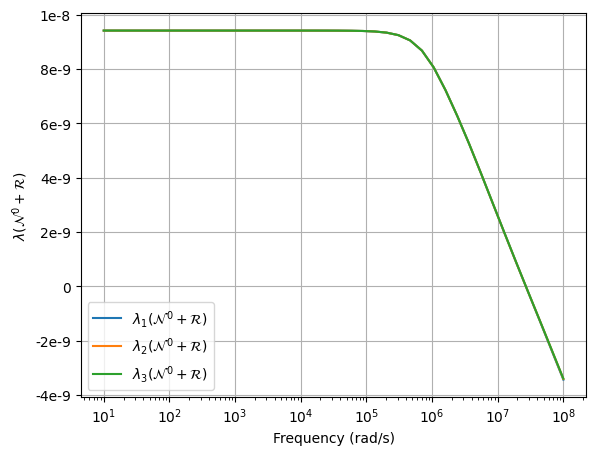

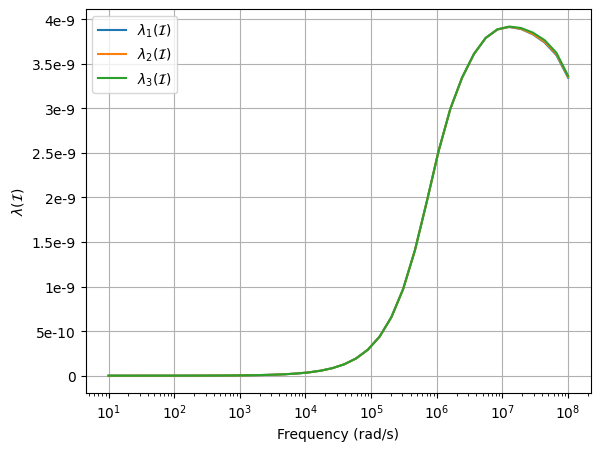

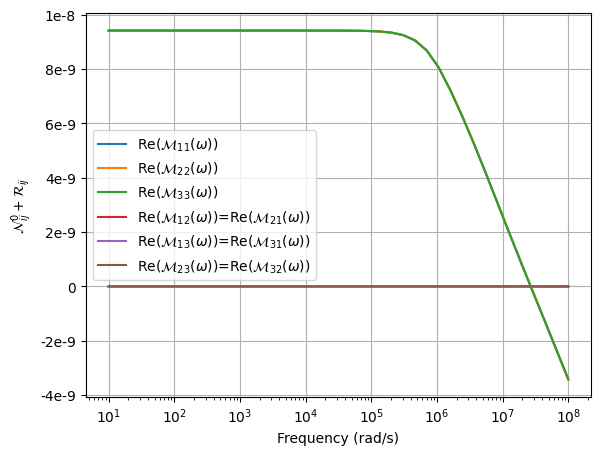

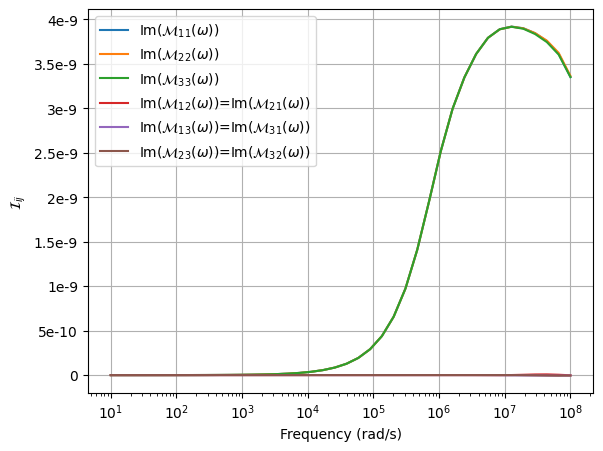

In [2]:
from main import main
Results_Dict = main()

We see that making changes to $\sigma_*$ corresponds to a horizontal translation in the MPT spectral signature, whereas changing $\mu_r$ alters both the shape and magnitude of the curves.

Also note that each different version of $\texttt{sphere.geo}$ is saved under a different subdirectory in the Results folder.


## Earring

For a more complex object, we work in a very similar way. i.e. defining object primitives and constructing other shapes via unions and intersections.
In this example, we build a simple earring, consisting of spherical end, a cylindrical post, and a flat cylindric back.

A sphere is defined by an origin and a radius r
```
sphere(x, y, z; r)
```

A cylinder in the .geo format is assumed to be infinitely long. To construct a finite cylinder, we need to calculate the intersection with a plane. First to define a cylinder we can use the cylinder primitive, which is defined by two points on the central axis and a radius r
```
cylinder(ax,ay,az; bx,by,bx; r)
```

and finally, to define a plane, we require a point on the plane, and a normal vector
```
plane(px,py,pz; nx, ny, nz)
```
A complete description of the other object primitives, as well as defining spline curves and surfaces is provided in the full documentation [http://netgen-mesher.sourceforge.net/docs/ng4.pdf](http://netgen-mesher.sourceforge.net/docs/ng4.pdf)

Combining these primitives produces the $\texttt{.geo} file description of the earring:
```
algebraic3d

#Outer domain
solid outer_box = orthobrick (-1000, -1000, -1000; 1000, 1000, 1000);

#Object parts
solid ball = sphere(6,0,0;1);
solid bar = cylinder(0,0,0;10,0,0;0.5)
	and plane(0,0,0;-1,0,0)
	and plane(6,0,0;1,0,0);
solid end = cylinder(-1,0,0;1,0,0;1.2)
	and plane(0,0,0;1,0,0)
	and plane(-0.5,0,0;-1,0,0);

#Combining parts
solid earing = ball or bar or end -maxh=0.25;
solid rest = outer_box and not earing;

#Defining top level objects
tlo rest -transparent -col=[0,0,1];#air
tlo earing -col=[1,0,0];#earring -mur=1 -sig=4.1E+07
```

## Specifying a .geo file to use with MPT-Calculator

We can specify a .geo file to use when running MPT-Calculator via the $\texttt{geometry}$ argument:
```python
main(geometry='sphere.geo')
```
runs the sphere example we have been working with thus far whereas calling
```python
main(geometry='Earring.geo')
```
runs the same sweep settings, but for the object defined in $\texttt{Earring.geo}$

Earring.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 18933


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains  18933 elements


Solving Theta0: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2979.61it/s]


 solved theta0 problems    
 solving theta1


Solving Theta1: 100%|███████████████████████████████████████████████████████████████| 40/40 [07:30<00:00, 11.26s/it]


Frequency Sweep complete


{'HostScriptFileName': 'C:\\Users\\james\\AppData\\Local\\Temp\\ipykernel_2144\\3878258534.py',
 'TensorArray': array([[-2.10163358e-17+4.89923873e-13j, -1.46639560e-22-1.82096100e-22j,
         -2.90492692e-23+1.77159474e-22j, -1.46639560e-22-1.82096100e-22j,
         -1.51210537e-17+3.96556376e-13j,  8.23955288e-22-1.98712103e-17j,
         -2.90492692e-23+1.77159474e-22j,  8.23955288e-22-1.98712103e-17j,
         -1.51201587e-17+3.96537409e-13j],
        [-4.80320759e-17+7.40654695e-13j, -3.35243088e-22-2.75307263e-22j,
         -6.63831222e-23+2.67819139e-22j, -3.35243088e-22-2.75307263e-22j,
         -3.45586130e-17+5.99504042e-13j,  1.88312351e-21-3.00408002e-17j,
         -6.63831222e-23+2.67819139e-22j,  1.88312351e-21-3.00408002e-17j,
         -3.45565674e-17+5.99475369e-13j],
        [-1.09775573e-16+1.11970330e-12j, -7.66342854e-22-4.16268873e-22j,
         -1.51704204e-22+4.04861080e-22j, -7.66342854e-22-4.16268873e-22j,
         -7.89824475e-17+9.06315260e-13j,  4.30381598

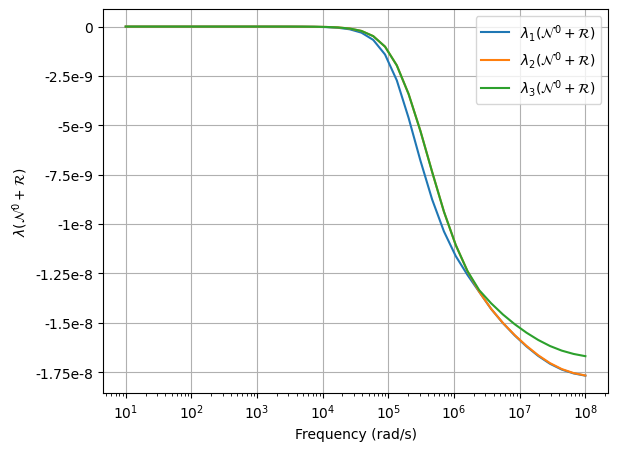

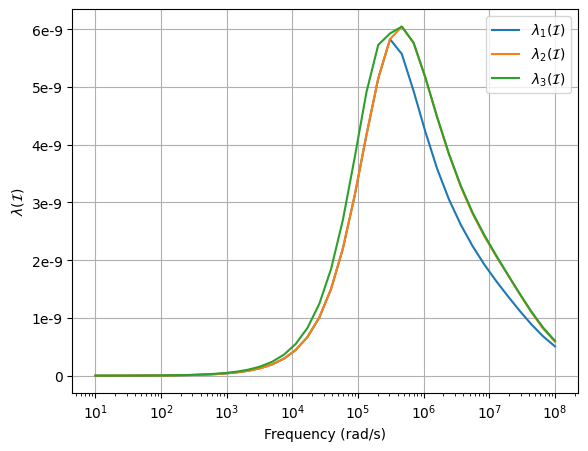

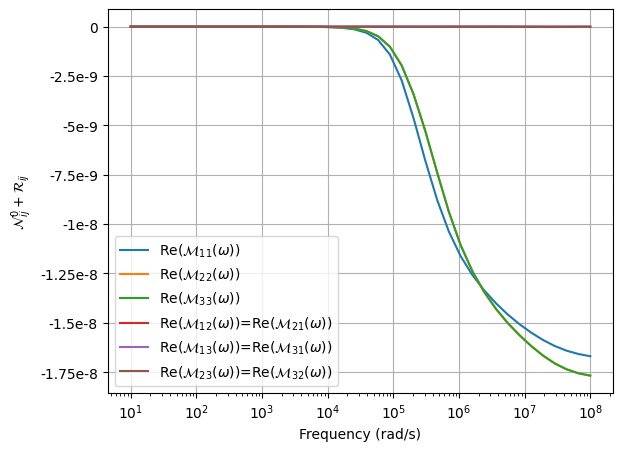

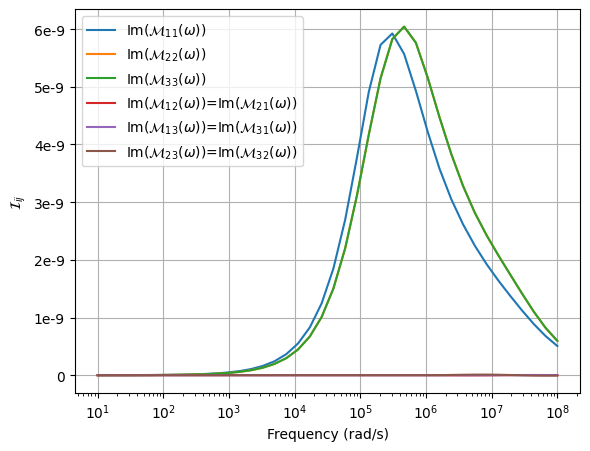

In [3]:
main(geometry='Earring.geo')

## Example .geo files
In the $\texttt{Geofiles/}$ directory there are many simple examples including object primitives such as a cylinder or cuboids. More complex examples include a rifle shell ($\texttt{rifle.geo}$), different types of large knifes ($\texttt{Knife_Cheap_Chef.geo}$, $\texttt{Knife_Cheap_Cutlet.geo}$), and an irregular tetrahedron ($\texttt{Tetra.geo}$).

Further examples can be found on the Netgen github page: [https://github.com/NGSolve/netgen/tree/master/tutorials](https://github.com/NGSolve/netgen/tree/master/tutorials)
